In [4]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np

In [5]:
tf.test.is_built_with_cuda()

True

In [6]:
#LoadData Set

(X_train, y_train), (X_test,y_test) = tf.keras.datasets.cifar10.load_data()

In [4]:
len(X_train)
X_train.shape

(50000, 32, 32, 3)

In [7]:
y_train
y_train[:5]

array([[6],
       [9],
       [9],
       [4],
       [1]], dtype=uint8)

In [8]:
def plot_sample(index):
    plt.figure(figsize = (15,2))
    plt.imshow(X_train[index])

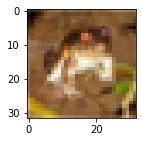

In [9]:
plot_sample(0)

In [10]:
classes = ["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]

In [11]:
# Preprocessing the data since it has 255 RGB pixcels
X_train_scaled = X_train / 255
X_test_scaled = X_test / 255

In [12]:
#one hot encoding for output varibles
y_train_categorical = keras.utils.to_categorical(
    y_train, num_classes=10, dtype='float32'
)
y_test_categorical = keras.utils.to_categorical(
    y_test, num_classes=10, dtype='float32'
)

In [13]:
y_train_categorical 

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.]], dtype=float32)

In [15]:
y_train.shape

(50000, 1)

In [14]:
y_train_categorical [0:5]

array([[0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

In [14]:
# since we have ten clases so output layer has 10 nueros and input layers can process 32*32
model = keras.Sequential([
        keras.layers.Flatten(input_shape=(32,32,3)),
        keras.layers.Dense(3000, activation='relu'),
        keras.layers.Dense(1000, activation='relu'),
        keras.layers.Dense(10, activation='sigmoid')    
    ])

model.compile(optimizer='SGD',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
model.fit(X_train_scaled, y_train_categorical, epochs=50)

Epoch 1/50
1563/1563 [==============================] - 8s 4ms/step - loss: 1.8082 - accuracy: 0.3564
Epoch 2/50
1563/1563 [==============================] - 6s 4ms/step - loss: 1.6211 - accuracy: 0.4278
Epoch 3/50
1563/1563 [==============================] - 5s 4ms/step - loss: 1.5407 - accuracy: 0.4573
Epoch 4/50
1563/1563 [==============================] - 6s 4ms/step - loss: 1.4807 - accuracy: 0.4802
Epoch 5/50
1563/1563 [==============================] - 5s 4ms/step - loss: 1.4304 - accuracy: 0.4959
Epoch 6/50
1563/1563 [==============================] - 6s 4ms/step - loss: 1.3883 - accuracy: 0.5128
Epoch 7/50
1563/1563 [==============================] - 5s 3ms/step - loss: 1.3474 - accuracy: 0.5271
Epoch 8/50
1563/1563 [==============================] - 6s 4ms/step - loss: 1.3141 - accuracy: 0.5372
Epoch 9/50
1563/1563 [==============================] - 6s 4ms/step - loss: 1.2804 - accuracy: 0.5532
Epoch 10/50
1563/1563 [==============================] - 6s 4ms/step - loss: 1.249

In [15]:
model.evaluate(X_test_scaled,y_test_categorical)

313/313 [==============================] - 1s 3ms/step - loss: 1.7326 - accuracy: 0.5260


[1.7326171398162842, 0.5260000228881836]

In [16]:
np.argmax(model.predict(X_test_scaled)[1])

9

In [17]:
pred_result=model.predict(X_test_scaled)

In [18]:
y_test_categorical[0:3]

array([[0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 0.]], dtype=float32)

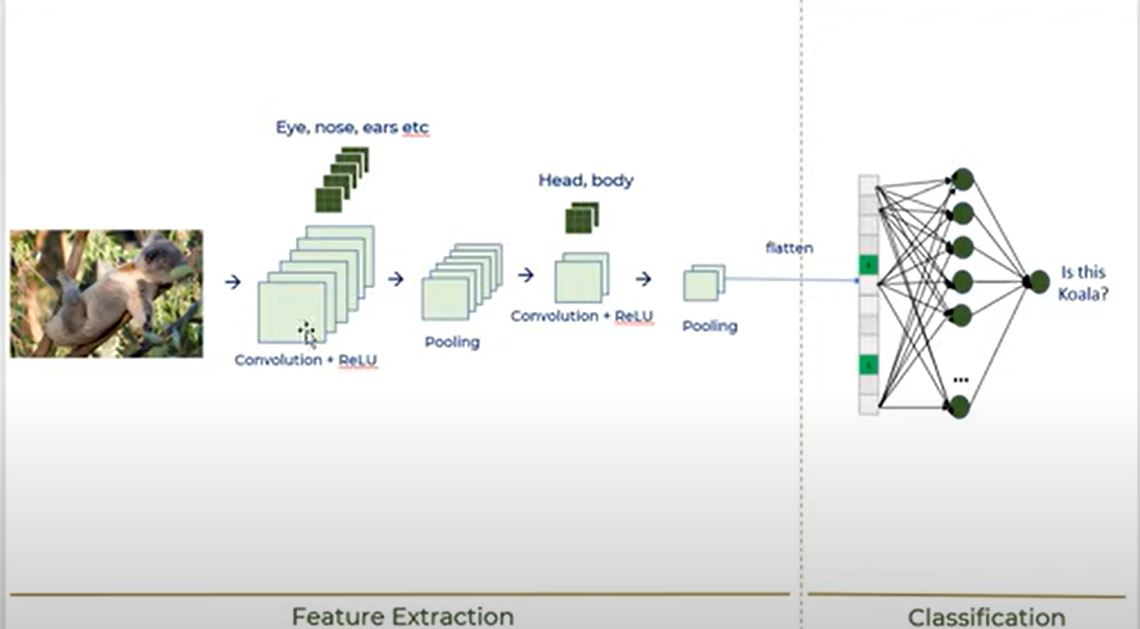

In [19]:
# here 32 is the number of filter (train and error) and Kernel_size is filter size 3X3
cnn = keras.Sequential([
    keras.layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(32, 32, 3)),
    keras.layers.MaxPooling2D((2, 2)),
    
    keras.layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
    keras.layers.MaxPooling2D((2, 2)),
    
    keras.layers.Flatten(),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])

cnn.compile(optimizer='SGD',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
cnn.fit(X_train_scaled, y_train_categorical, epochs=50)

Epoch 1/50
1563/1563 [==============================] - 19s 4ms/step - loss: 2.0215 - accuracy: 0.2578
Epoch 2/50
1563/1563 [==============================] - 6s 4ms/step - loss: 1.6301 - accuracy: 0.4155
Epoch 3/50
1563/1563 [==============================] - 6s 4ms/step - loss: 1.4343 - accuracy: 0.4892
Epoch 4/50
1563/1563 [==============================] - 6s 4ms/step - loss: 1.3311 - accuracy: 0.5320
Epoch 5/50
1563/1563 [==============================] - 6s 4ms/step - loss: 1.2502 - accuracy: 0.5616
Epoch 6/50
1563/1563 [==============================] - 6s 4ms/step - loss: 1.1798 - accuracy: 0.5860
Epoch 7/50
1563/1563 [==============================] - 6s 4ms/step - loss: 1.1196 - accuracy: 0.6098
Epoch 8/50
1563/1563 [==============================] - 6s 4ms/step - loss: 1.0678 - accuracy: 0.6283
Epoch 9/50
1563/1563 [==============================] - 6s 4ms/step - loss: 1.0224 - accuracy: 0.6421
Epoch 10/50
1563/1563 [==============================] - 6s 4ms/step - loss: 0.98

In [20]:
cnn.evaluate(X_test_scaled,y_test_categorical)

313/313 [==============================] - 1s 3ms/step - loss: 2.0300 - accuracy: 0.6511


[2.0300168991088867, 0.6510999798774719]

In [21]:
y_pred = cnn.predict(X_test_scaled)
y_pred[:5]

array([[1.9572440e-07, 8.0900328e-08, 5.6321657e-08, 9.9899310e-01,
        1.9750232e-07, 2.0095586e-05, 9.8241062e-04, 7.5331052e-12,
        3.9606275e-06, 4.1667397e-10],
       [1.6554337e-02, 3.1288441e-02, 6.9674114e-11, 1.9472844e-13,
        9.0244821e-15, 6.6131361e-16, 2.3484388e-13, 6.4744840e-13,
        9.5215720e-01, 2.8727571e-08],
       [1.9008834e-02, 1.8113644e-05, 7.9902208e-08, 3.8373926e-08,
        1.0835932e-07, 3.2855060e-10, 2.4673533e-13, 1.0073721e-08,
        9.8097265e-01, 2.5711284e-07],
       [9.9767405e-01, 2.1221686e-06, 1.6329448e-08, 4.7194335e-04,
        9.2329770e-09, 1.4652117e-12, 2.2718095e-06, 5.2014877e-12,
        1.8491880e-03, 4.9292163e-07],
       [4.2663723e-16, 1.0078657e-10, 4.0780606e-07, 4.7865533e-06,
        9.7215921e-01, 1.3823552e-07, 2.7835526e-02, 1.7872707e-14,
        3.8429045e-11, 8.7642038e-12]], dtype=float32)

In [22]:
y_classes = [np.argmax(element) for element in y_pred]
y_classes[:5]

[3, 8, 8, 0, 4]

In [23]:
y_test=y_test.reshape(-1,)

In [24]:
y_test[:5]

array([3, 8, 8, 0, 6], dtype=uint8)

In [25]:
def plot_sample(x,y,index):
    plt.figure(figsize = (15,2))
    plt.imshow(X_test[index])
    plt.xlabel(classes[y[index]]), 


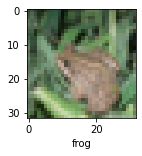

In [26]:
plot_sample(X_test, y_test,4)

In [27]:
classes[y_classes[2]]

'ship'

In [28]:
#Improve Test Accuracy Using Data Augmentation, Since the model training is 96% and perdition is 66% model tends to over fit.
data_augmentation = keras.Sequential(
  [
    keras.layers.experimental.preprocessing.RandomFlip("horizontal", 
                                                 input_shape=(32, 
                                                              32,
                                                              3)),
    keras.layers.experimental.preprocessing.RandomRotation(0.1),
    keras.layers.experimental.preprocessing.RandomZoom(0.1),
  ]
)



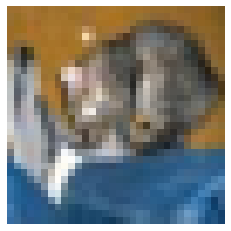

In [31]:
plt.axis('off')
#plt.figure(figsize = (15,2))
plt.imshow(data_augmentation(X_test)[0].numpy().astype("uint8"))

In [19]:
cnn = keras.Sequential([
    data_augmentation,
    keras.layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(32, 32, 3)),
    keras.layers.MaxPooling2D((2, 2)),
    
    keras.layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
    keras.layers.MaxPooling2D((2, 2)),
    keras.layers.Dropout(0.2),
    keras.layers.Flatten(),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])

cnn.compile(optimizer='SGD',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
cnn.fit(X_train_scaled, y_train_categorical, epochs=500,batch_size=50)

Epoch 1/500
1000/1000 [==============================] - 5s 5ms/step - loss: 2.1869 - accuracy: 0.1888
Epoch 2/500
1000/1000 [==============================] - 4s 4ms/step - loss: 1.9060 - accuracy: 0.3137
Epoch 3/500
1000/1000 [==============================] - 4s 4ms/step - loss: 1.7097 - accuracy: 0.3876
Epoch 4/500
1000/1000 [==============================] - 4s 4ms/step - loss: 1.5991 - accuracy: 0.4259
Epoch 5/500
1000/1000 [==============================] - 4s 4ms/step - loss: 1.5378 - accuracy: 0.4488
Epoch 6/500
1000/1000 [==============================] - 4s 4ms/step - loss: 1.4953 - accuracy: 0.4619
Epoch 7/500
1000/1000 [==============================] - 4s 4ms/step - loss: 1.4622 - accuracy: 0.4781
Epoch 8/500
1000/1000 [==============================] - 4s 4ms/step - loss: 1.4341 - accuracy: 0.4900
Epoch 9/500
1000/1000 [==============================] - 4s 4ms/step - loss: 1.4030 - accuracy: 0.5040
Epoch 10/500
1000/1000 [==============================] - 5s 5ms/step - l

In [20]:
cnn.evaluate(X_test_scaled,y_test_categorical)

313/313 [==============================] - 1s 3ms/step - loss: 0.7685 - accuracy: 0.7643


[0.7685364484786987, 0.7642999887466431]